In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Set styles
sns.set(style='whitegrid')

df = pd.read_csv('../data/Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
print("Shape of dataset:", df.shape)

df.info()

df.describe()

df.isnull().sum()

Shape of dataset: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

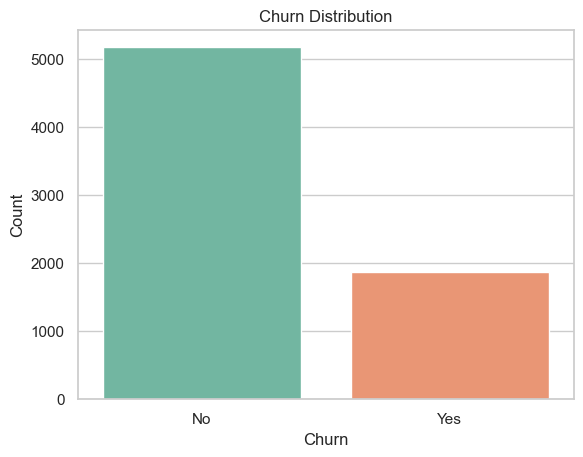

In [37]:
df['Churn'].value_counts()

df['Churn'].value_counts(normalize=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [30]:
# df.drop('customerID', axis=1, inplace=True)

## Q. How do i check object for individual column in df
df['TotalCharges'].dtype
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check again for missing values
df.isnull().sum()

# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/var/folders/kg/2psfg_ds7tx_xlmb_779zcw80000gn/T/ipykernel_13693/776013119.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


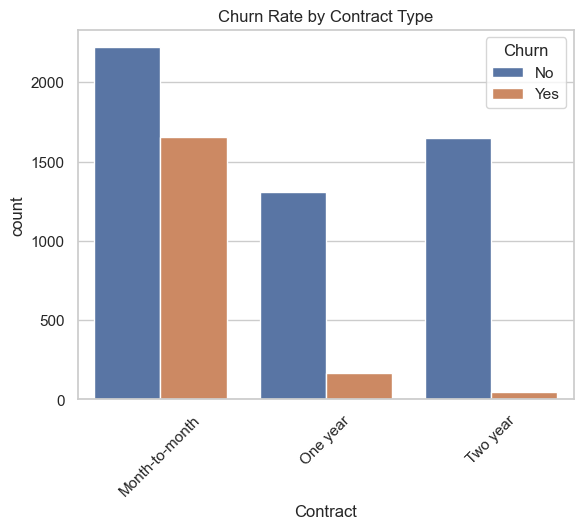

In [38]:
cat_cols = df.select_dtypes(include='object').columns

# Example: Churn by Contract Type
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.xticks(rotation=45)
plt.show()

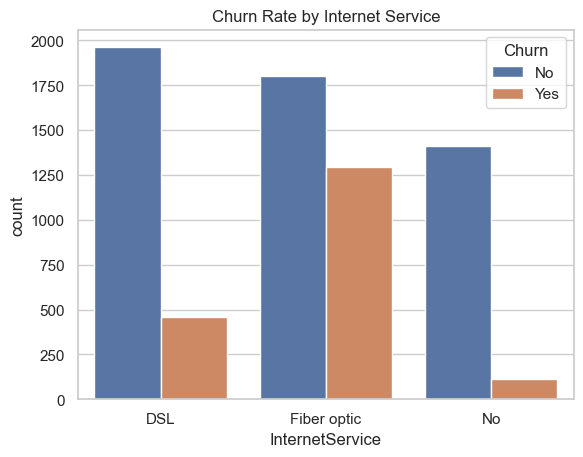

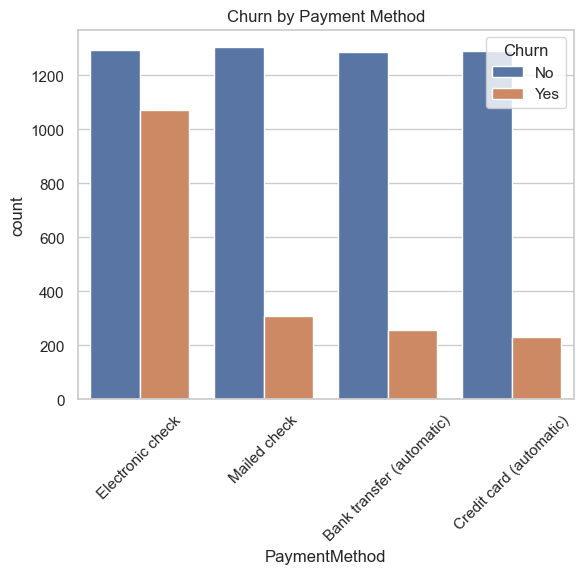

In [39]:
# Internet Service
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Rate by Internet Service')
plt.show()

# Payment Method
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

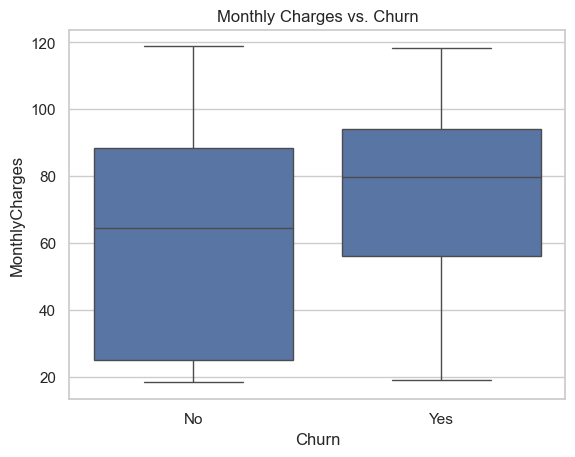

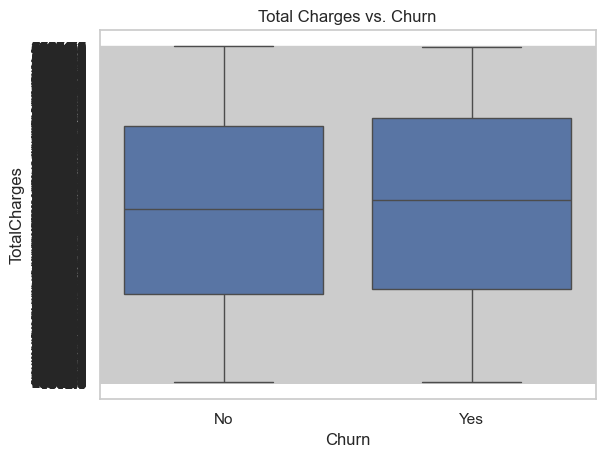

In [40]:
# Monthly Charges
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs. Churn')
plt.show()

# Total Charges
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges vs. Churn')
plt.show()

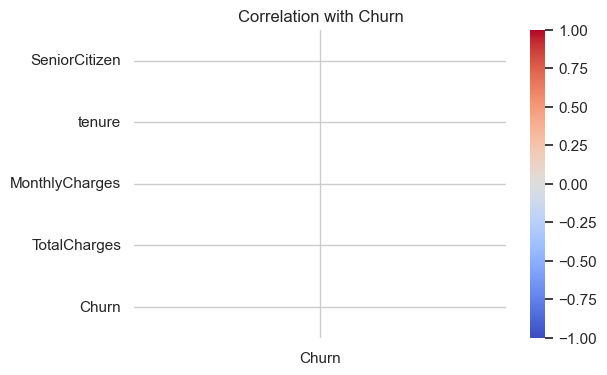

In [41]:
plt.figure(figsize=(6, 4))

sns.heatmap(
    corr[['Churn']].sort_values(by='Churn', ascending=False).round(2),  # round to 2 decimals
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1  # set fixed color scale for better contrast
)

plt.title("Correlation with Churn")
plt.show()

In [42]:
# Save cleaned dataset
df.to_csv('../data/telco_churn_cleaned.csv', index=False)